In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading data
<font size="4">o read the data, we use the read_csv command from the Pandas library.</font>

In [3]:
#We have read the data with which we will train the prediction model.

training_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')



# Data Analysis
<font size="4">To examine and analyze the shape of the data, their distribution, and their impact on the survival rate, we used plotting functions from the Seaborn and Matplotlib libraries. To visualize the nature of the data, we used the info() and describe() functions from the Pandas library.</font>

In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
#We check the distribution of 0/1 values in the 'Survived' column for the training dataset.
number_of_survivors = len(training_data.loc[training_data['Survived'] == 1])
number_of_deceased = len(training_data.loc[training_data['Survived'] == 0])
print("The percentage of passengers who survived: {0:.2f}%".format(number_of_survivors/len(training_data.index)*100))
print("The percentage of passengers who perished: {0:.2f}%".format(number_of_deceased/len(training_data.index)*100))

The percentage of passengers who survived: 38.38%
The percentage of passengers who perished: 61.62%


<font size="3">From the output of the info function, I observe that there are 2 missing values in the 'Embarked' column, 177 missing values in the 'Age' column, and 687 missing values in the 'Cabin' column. I will address these cases when I begin to manipulate the data. For now, I will plot graphs for each column individually to identify any correlations between the data and the survival rate. </font>

# Passenger class
<font size="3">We observe that passengers in the first and second classes have a significantly higher chance of survival compared to those in the third class. This could be partly due to the cabin allocation, as cabins in the third class are located on the lower decks.</font>

C:\Users\danut\AppData\Local\Temp\ipykernel_29832\390655143.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=training_data,palette="Blues")


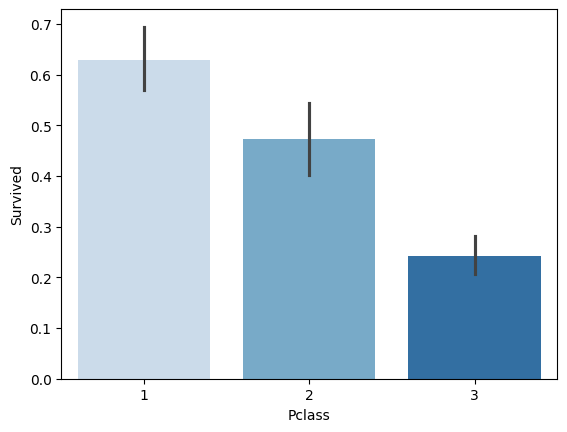

In [8]:
sns.barplot(x='Pclass', y='Survived', data=training_data,palette="Blues")
plt.show()

# Passenger gender
<font size="3">From the graph, we observe the relevance of passenger gender with respect to the survival rate, with females having a significantly higher survival rate.</font>

C:\Users\danut\AppData\Local\Temp\ipykernel_29832\897416352.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=training_data,palette="Blues")


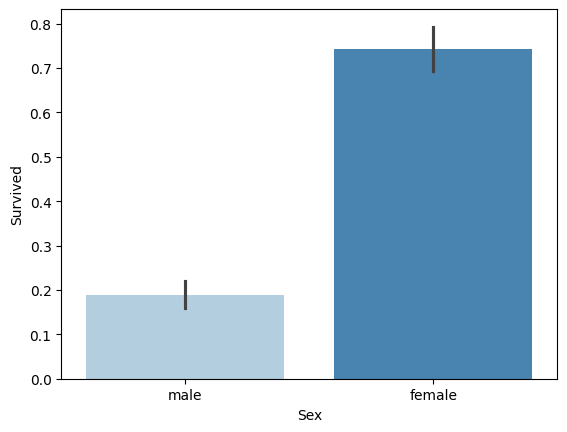

In [9]:
sns.barplot(x='Sex', y='Survived', data=training_data,palette="Blues")
plt.show()

In [11]:
training_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

# Age
<font size = "3">We observe that men between the ages of 25 and 35 had the highest chances of survival, as well as those between 0 and 5 years old. For women, the age groups between 20 and 30 and between 35 and 50 had lower chances of survival. Additionally, to fill in the missing values, I will generate random numbers using the mean and standard deviation.</font>

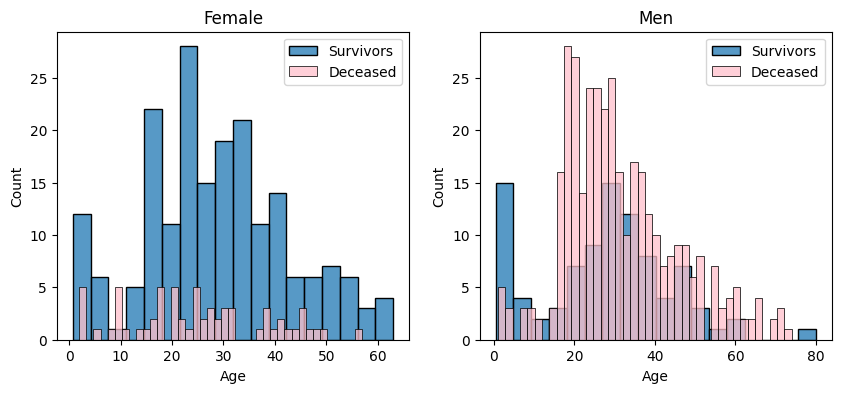

In [10]:
survivors = 'Survivors'
deceased = 'Deceased'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
female = training_data[training_data['Sex']=='female']
men = training_data[training_data['Sex']=='male']
ax = sns.histplot(female[female['Survived']==1].Age.dropna(), bins=18, label = survivors, ax = axes[0], kde =False)
ax = sns.histplot(female[female['Survived']==0].Age.dropna(), bins=40, label = deceased, ax = axes[0], kde =False, color = 'Pink')
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survivors, ax = axes[1], kde = False)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label = deceased, ax = axes[1], kde = False, color = 'Pink')
ax.legend()
_ = ax.set_title('Men')
plt.show()

# SibSp
<font size="3">SibSp contains the number of siblings/spouses aboard the Titanic. We observe that the chances of survival increase up to a value of 2, and then decrease, indicating that a larger family size of more than 3 people tends to have lower chances of survival.</font>

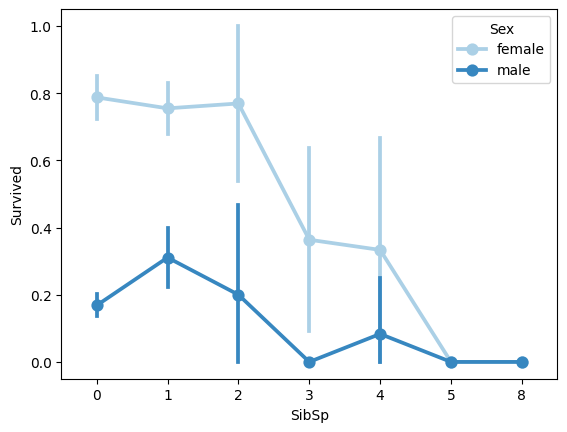

In [11]:
sns.pointplot(x = "SibSp", y = "Survived", hue="Sex", data=training_data, palette="Blues")
plt.show()

# Parch
<font size="3">Parch represents the number of parents/children the person has aboard. From the graph, we observe the same trend as with the SibSp column. Therefore, we could combine these into a single column called Relatives and examine its impact.</font>

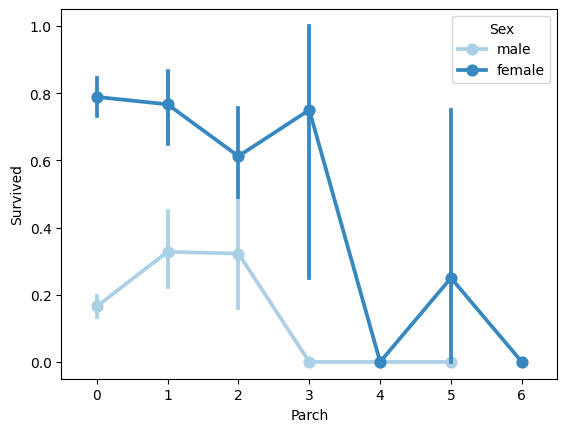

In [12]:
sns.pointplot(x = "Parch", y = "Survived", hue="Sex", data=training_data,palette="Blues")
plt.show()

# Ticket
<font size = "3">In the case of the ticket number, there are too many unique values. Therefore, this column does not provide useful information for training the model, so I will omit it.</font>

In [13]:
training_data['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

# Fare
<font size = "3">From the graph, we observe a large number of values between 0 and 50. This can be attributed to the distribution of passengers across classes: 324 passengers in first class, 284 in second class, and 709 in third class, with ticket prices reflecting this distribution. </font>

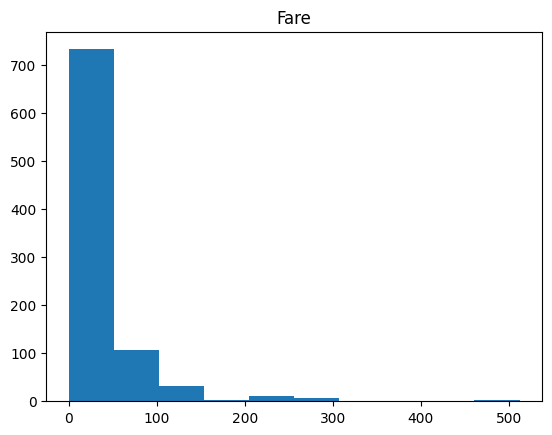

In [14]:
plt.hist(x = training_data['Fare'])
plt.title('Fare')
plt.show()

# Cabin
<font size = "3"> Since 77% of the data in this column is missing, I will choose to omit it. </font>

In [15]:
print("The percentage of missing values in the 'Cabin' column is: {0:.2f}%".format(training_data["Cabin"].isnull().sum()/len(training_data.index)*100))

The percentage of missing values in the 'Cabin' column is: 77.10%


# Embarked
<font size = "3">We observe that passengers who boarded in Cherbourg had higher chances of survival, while those who boarded in Southampton had the lowest chances of survival. Additionally, to address the 2 missing values, I will assume that these passengers boarded in Southampton, the most frequent value.).</font>

In [16]:
number_of_survivors_S = len(training_data[(training_data.Survived == 1) & (training_data.Embarked == 'S')].index)
number_of_survivors_C = len(training_data[(training_data.Survived == 1) & (training_data.Embarked == 'C')].index)
number_of_survivors_Q = len(training_data[(training_data.Survived == 1) & (training_data.Embarked == 'Q')].index)
number_of_deceased_S = len(training_data[(training_data.Survived == 0) & (training_data.Embarked == 'S')].index)
number_of_deceased_C = len(training_data[(training_data.Survived == 0) & (training_data.Embarked == 'C')].index)
number_of_deceased_Q = len(training_data[(training_data.Survived == 0) & (training_data.Embarked == 'Q')].index)
print("The percentage of passengers boarded in Southampton who survived: {0:.2f}%".format(number_of_survivors_S/(number_of_survivors_S + number_of_deceased_S)*100))
print("The percentage of passengers boarded in Cherbourg who survived: {0:.2f}%".format(number_of_survivors_C/(number_of_survivors_C + number_of_deceased_C)*100))
print("The percentage of passengers boarded in Queenstown who survived: {0:.2f}%".format(number_of_survivors_Q/(number_of_survivors_Q + number_of_deceased_Q)*100))

The percentage of passengers boarded in Southampton who survived: 33.70%
The percentage of passengers boarded in Cherbourg who survived: 55.36%
The percentage of passengers boarded in Queenstown who survived: 38.96%


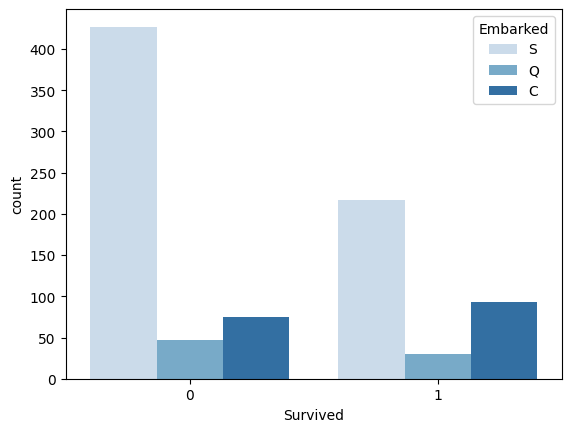

In [17]:
sns.countplot( x='Survived', data=training_data, hue="Embarked",palette="Blues")
plt.show()

# Name
<font size = "3"> We notice that we could extract the title of the person from the name, such as Mr, Mrs, etc.</font>

In [18]:
training_data.Name.head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

# Data cleaning
<font size = "3"> We begin by addressing the null values and omitting the 'Cabin' and 'Ticket' columns. I will apply these changes to both the training and test datasets. For the 'Embarked' column, I will fill the null values with 'S', as this is where the majority of passengers boarded. Additionally, I will convert all text values to numeric values, as certain algorithms do not support mixed data types.
</font>

In [19]:
training_data.Embarked = training_data.Embarked.fillna('S')

training_data.replace({'male': 0, 'female': 1}, inplace=True)
test_data.replace({'male': 0, 'female': 1}, inplace=True)
training_data.replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)
test_data.replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)

C:\Users\danut\AppData\Local\Temp\ipykernel_29832\847240382.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training_data.replace({'male': 0, 'female': 1}, inplace=True)
C:\Users\danut\AppData\Local\Temp\ipykernel_29832\847240382.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.replace({'male': 0, 'female': 1}, inplace=True)
C:\Users\danut\AppData\Local\Temp\ipykernel_29832\847240382.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old beha

In [20]:
training_data = training_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)
training_data = training_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

In [21]:
training_data['Fare'] = training_data['Fare'].fillna(training_data.Fare.median()).astype(int)
test_data['Fare'] = test_data['Fare'].fillna(test_data.Fare.median()).astype(int)
training_data['Age'] = training_data['Age'].fillna(method = 'pad').astype(int)
test_data['Age'] = test_data['Age'].fillna(method = 'pad').astype(int)

C:\Users\danut\AppData\Local\Temp\ipykernel_29832\3660298682.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  training_data['Age'] = training_data['Age'].fillna(method = 'pad').astype(int)
C:\Users\danut\AppData\Local\Temp\ipykernel_29832\3660298682.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data['Age'] = test_data['Age'].fillna(method = 'pad').astype(int)


In [23]:
#We check if there are any remaining null values.
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int64 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Fare         891 non-null    int64 
 9   Embarked     891 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 69.7+ KB


In [24]:
training_data.corr().abs()[["Survived"]]

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [25]:
#verific daca am coloane corelate
rs = np.random.RandomState(0)
corr = training_data.corr()
corr.style.background_gradient(cmap='coolwarm')

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

# Data manipulation
<font size = "3"> We extract the title from the name and combine SibSp with Parch. We convert all text data into numeric values, apply a logarithmic transformation to the Fare column, and implement a data normalization algorithm.
</font>

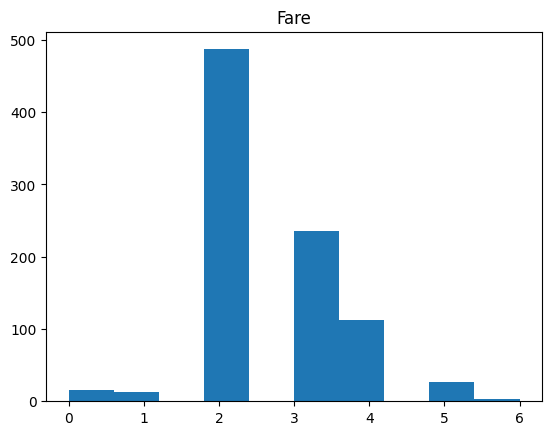

In [26]:
#logaritmez coloana fare
training_data['Fare'] = np.log(training_data.Fare+1).astype(int)
test_data['Fare'] = np.log(test_data.Fare+1).astype(int)
plt.hist(x = training_data['Fare'])
plt.title('Fare')
plt.show()

In [27]:
#We extract only the titles from the names and then remove the 'Name' column.
training_data['Title'] = training_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
training_data = training_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

In [28]:
training_data['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [29]:
#We consolidate special titles under a single definition, namely "Others."
training_data.replace({'Master': 'Master','Mrs': 'Mrs','Miss': 'Miss','Mr': 'Mr','Dr': 'Altele', 'Rev': 'Altele', 'Mlle' : 'Altele', 'Major' : 'Altele', 'Col' : 'Altele', 'Lady' : 'Altele', 'Don' : 'Altele', 'Mme' : 'Altele', 'Ms' : 'Altele', 'the Countess' : 'Altele', 'Sir' : 'Altele', 'Capt' : 'Altele', 'Jonkheer' : 'Altele', 'Dona':'Altele'}, inplace=True)
test_data.replace({'Master': 'Master','Mrs': 'Mrs','Miss': 'Miss','Mr': 'Mr','Dr': 'Altele', 'Rev': 'Altele', 'Mlle' : 'Altele', 'Major' : 'Altele', 'Col' : 'Altele', 'Lady' : 'Altele', 'Don' : 'Altele', 'Mme' : 'Altele', 'Ms' : 'Altele', 'the Countess' : 'Altele', 'Sir' : 'Altele', 'Capt' : 'Altele', 'Jonkheer' : 'Altele', 'Dona':'Altele'}, inplace=True)

In [30]:
#We transform the text into numeric values.

training_data.replace({'Mr' : 0, 'Miss' : 1, 'Mrs': 2, 'Master' : 3, 'Altele' : 4}, inplace=True)
test_data.replace({'Mr' : 0, 'Miss' : 1, 'Mrs': 2, 'Master' : 3, 'Altele' : 4}, inplace=True)

C:\Users\danut\AppData\Local\Temp\ipykernel_29832\933478418.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training_data.replace({'Mr' : 0, 'Miss' : 1, 'Mrs': 2, 'Master' : 3, 'Altele' : 4}, inplace=True)
C:\Users\danut\AppData\Local\Temp\ipykernel_29832\933478418.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.replace({'Mr' : 0, 'Miss' : 1, 'Mrs': 2, 'Master' : 3, 'Altele' : 4}, inplace=True)


In [31]:
final_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch' ,'Fare', 'Title']
X_test = test_data[final_columns]
X_train = training_data[final_columns]
y_train = training_data['Survived']
training_data = training_data[final_columns]

In [32]:
#Data normalization
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
normalizator = MinMaxScaler()
X_antrenare = normalizator.fit_transform(X_train)
X_test = normalizator.fit_transform(X_test)

In [33]:
from sklearn.model_selection import train_test_split
#We split the existing training data into training data and validation data.
X_train_split, X_validation, y_train_split, y_validation = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

# Model selection
<font size = "3"> I will test several models with default values, from which I will select the top 3 and improve them using hyperparameters. With these models, I will make predictions. Additionally, I will use ensemble methods such as soft voting and hard voting.
</font>

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

In [36]:
#Naive Bayes
gaussian_nb = GaussianNB()
cv = cross_val_score(gaussian_nb, X_train, y_train, cv=5)
print(cv.mean())

0.7991212102190697


In [37]:
#Support Vector Classifier
svc = SVC(probability=True)
cv = cross_val_score(svc, X_train, y_train ,cv=5)
print(cv.mean())

0.7183102127926684


In [38]:
#K-Nearest Neighbors
KNN = KNeighborsClassifier()
cv = cross_val_score(KNN,X_train,y_train,cv=5)
print(cv.mean())

0.7766806854560292


In [39]:
#Random Forest
RF = RandomForestClassifier()
cv = cross_val_score(RF,X_train,y_train,cv=5)
print(cv.mean())

0.8047391877471595


In [40]:
#Logistic Regression
LR = LogisticRegression()
cv = cross_val_score(LR,X_train,y_train,cv=5)
print(cv.mean())

0.7957315924926244


In [41]:
#Decision Tree Classifier
DTC = DecisionTreeClassifier()
cv = cross_val_score(DTC,X_train,y_train,cv=5)
print(cv.mean())

0.7856443412215178


In [42]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV

In [43]:
knn = KNeighborsClassifier()
parameters = {
                'n_neighbors' : [3,5,7,9,11],
                'weights' : ['uniform', 'distance'],
                'algorithm' : ['auto', 'ball_tree','kd_tree', 'brute'],
                'p' : [1,2]
            }
gs_knn = GridSearchCV(knn, param_grid = parameters, verbose = True, n_jobs = -1)
knn = gs_knn.fit(X_train,y_train)
print('The best performance: ' + str(knn.best_score_))
print("The optimal parameters: " + str(knn.best_params_))


Fitting 5 folds for each of 80 candidates, totalling 400 fits
The best performance: 0.8092398468394955
The optimal parameters: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [44]:
svc = SVC(probability=True)
parameters = [
                {'kernel': ['rbf'], 'gamma': [.1, .5, .75, 1, 1.25, 2, 2.5], 'C': [.1, .25, .5, .75, 1, 10]},
                {'kernel': ['linear'], 'C': [.1,.25, .5, .75, 1, 10]},
                {'kernel': ['poly'], 'degree' : [1,2,3,4,5], 'C': [.1, .25, .5, .75, 1, 10]}
            ]
gs_svc = GridSearchCV(svc, param_grid = parameters, verbose = True, n_jobs = -1)
svc = gs_svc.fit(X_train,y_train)
print('The best performance: ' + str(svc.best_score_))
print("The optimal parameters: " + str(svc.best_params_))

Fitting 5 folds for each of 78 candidates, totalling 390 fits
The best performance: 0.8103571652752495
The optimal parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [45]:
lr = LogisticRegression()
parameters = {
                'penalty' : ['l1', 'l2'],
                'C' : np.logspace(-2, 2, 30),
                'solver' : ['liblinear'],
                'max_iter' : [2000]
            }
gs_lr = GridSearchCV(lr, param_grid = parameters, verbose = True, n_jobs = -1)
lr = gs_lr.fit(X_train, y_train)
print("The best performance: " + str(lr.best_score_))
print("The optimal parameters: " + str(lr.best_params_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
The best performance: 0.8013997865796245
The optimal parameters: {'C': np.float64(0.018873918221350976), 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [46]:
rf = RandomForestClassifier(random_state = 1)
parameters = {
                'n_estimators': [100,250,500,750,1000], 
                'bootstrap': [True,False],
                'max_depth': [5,10,20,50,75,100,None],
                'max_features': ['auto','sqrt'],
                'min_samples_leaf': [1,2,5,10],
                'min_samples_split': [2,5,10]
            }
                                  
rf_randomized = RandomizedSearchCV(rf, param_distributions = parameters, n_iter = 100, verbose = True, n_jobs = -1)
cel_mai_bun_rf_randomized = rf_randomized.fit(X_train,y_train)
print("The best performance:" + str(cel_mai_bun_rf_randomized.best_score_))
print("The optimal parameters: " + str(cel_mai_bun_rf_randomized.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\danut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
134 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\danut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\danut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\danut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

The best performance:0.8237838177138912
The optimal parameters: {'n_estimators': 750, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': True}


In [50]:
rf = RandomForestClassifier()
parametri = {
                'n_estimators': [700,750,800],
                'criterion': ['gini' , 'entropy'],
                'bootstrap': [False],
                'max_depth': [4,5,6],
                'max_features': ['log2','sqrt'],
                'min_samples_leaf': [1,2],
                'min_samples_split': [5,6]
            }
                                  
gs_rf = GridSearchCV(rf, param_grid = parametri, verbose = True, n_jobs = -1)
rf = gs_rf.fit(X_antrenare,y_antrenare)
print("Cea mai buna performanta: " + str(rf.best_score_))
print("Cei mai buni parametri: " + str(rf.best_params_))

Fitting 5 folds for each of 144 candidates, totalling 720 fits


c:\Users\danut\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Cea mai buna performanta: 0.8293955181721173
Cei mai buni parametri: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 700}


In [51]:
knn_final = knn.best_estimator_
svc_final = svc.best_estimator_
rf_final = rf.best_estimator_

In [52]:
vot_hard = VotingClassifier(estimators = [('knn',knn_final),('rf',rf_final),('svc',svc_final)], voting = 'hard') 
vot_soft = VotingClassifier(estimators = [('knn',knn_final),('rf',rf_final),('svc',svc_final)], voting = 'soft') 

In [53]:
print('voting_clf_hard :',cross_val_score(vot_hard,X_antrenare,y_antrenare,cv=5))
print('voting_clf_hard media performantelor :',cross_val_score(vot_hard,X_antrenare,y_antrenare,cv=5).mean())

print('voting_clf_soft :',cross_val_score(vot_soft,X_antrenare,y_antrenare,cv=5))
print('voting_clf_soft media performantelor :',cross_val_score(vot_soft,X_antrenare,y_antrenare,cv=5).mean())

voting_clf_hard : [0.84916201 0.80898876 0.8258427  0.80337079 0.85955056]
voting_clf_hard media performantelor : 0.8293892411022536
voting_clf_soft : [0.84357542 0.79775281 0.84269663 0.80898876 0.85393258]
voting_clf_soft media performantelor : 0.8271420500910176


In [54]:
#antrenez modelele pe o parte din setul de date de antrenare
svc_final.fit(X_antrenare_split, y_antrenare_split)
rf_final.fit(X_antrenare_split, y_antrenare_split)
vot_hard.fit(X_antrenare_split, y_antrenare_split)
vot_soft.fit(X_antrenare_split, y_antrenare_split)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3, p=1)),
                             ('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     criterion='entropy',
                                                     max_depth=5,
                                                     min_samples_split=5,
                                                     n_estimators=700)),
                             ('svc', SVC(C=0.75, gamma=2, probability=True))],
                 voting='soft')

In [55]:
#fac predictii pe setul de validare pastrat
y_pred_prob_rf = rf_final.predict_proba(X_validare)[:,1]
y_pred_rf = rf_final.predict(X_validare)
y_pred_prob_svc = svc_final.predict_proba(X_validare)[:,1]
y_pred_svc = svc_final.predict(X_validare)
y_pred_prob_vc_soft = vot_soft.predict_proba(X_validare)[:,1]
y_pred_vc_soft = vot_soft.predict(X_validare)
y_pred_vc_hard = vot_hard.predict(X_validare)

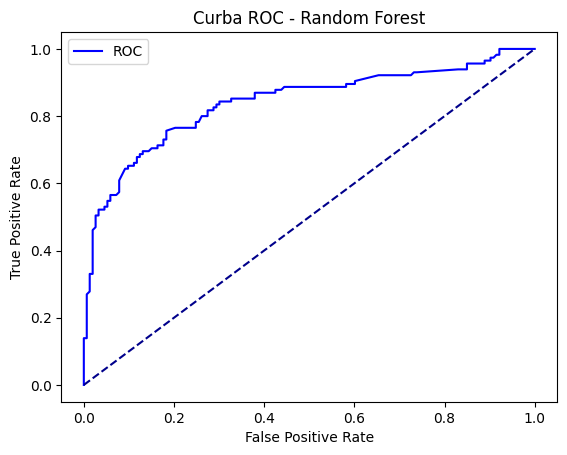

Scor AUC:  0.780306905370844


In [56]:
fper, tper, thresholds = roc_curve(y_validare, y_pred_prob_rf) 
plt.plot(fper, tper, color='blue', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curba ROC - Random Forest')
plt.legend()
plt.show()
auc_rf = roc_auc_score(y_validare, y_pred_rf)
print("Scor AUC: ", auc_rf)

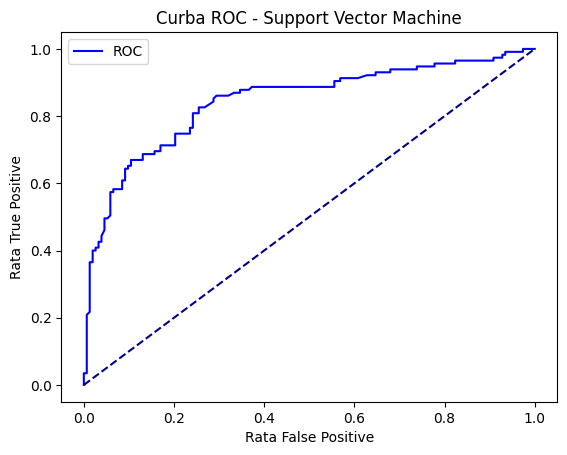

Scor AUC:  0.7824950269963059


In [58]:
fper, tper, thresholds = roc_curve(y_validare, y_pred_prob_svc) 
plt.plot(fper, tper, color='blue', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('Rata False Positive')
plt.ylabel('Rata True Positive')
plt.title('Curba ROC - Support Vector Machine')
plt.legend()
plt.show()
auc_svc = roc_auc_score(y_validare, y_pred_svc)
print("Scor AUC: ", auc_svc)

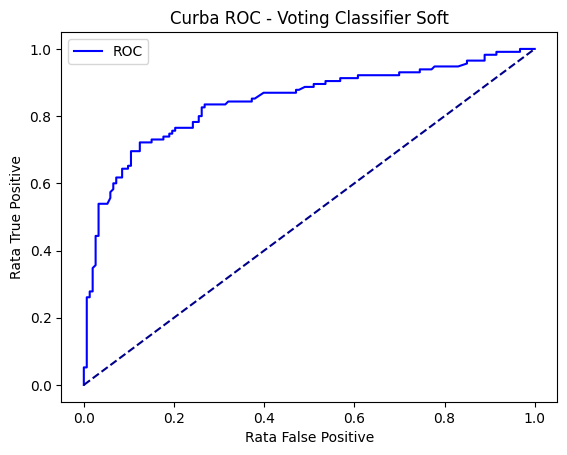

Scor AUC:  0.7781472009093493


In [59]:
fper, tper, thresholds = roc_curve(y_validare, y_pred_prob_vc_soft) 
plt.plot(fper, tper, color='blue', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('Rata False Positive')
plt.ylabel('Rata True Positive')
plt.title('Curba ROC - Voting Classifier Soft')
plt.legend()
plt.show()
auc_vc_soft = roc_auc_score(y_validare, y_pred_vc_soft)
print("Scor AUC: ", auc_vc_soft)

In [60]:
auc_vc_hard = roc_auc_score(y_validare, y_pred_vc_hard)
print("Scor AUC: ", auc_vc_hard)

Scor AUC:  0.7868428530832624


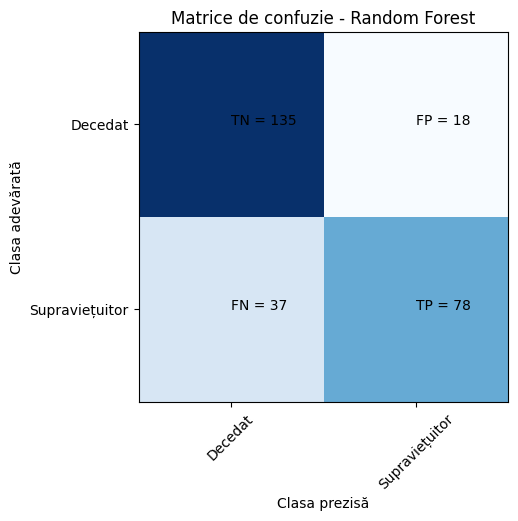

In [61]:
matrice_confuzie_rf = confusion_matrix(y_true=y_validare, y_pred=y_pred_rf)
plt.clf()
plt.imshow(matrice_confuzie_rf, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Decedat','Supraviețuitor']
plt.title('Matrice de confuzie - Random Forest')
plt.ylabel('Clasa adevărată')
plt.xlabel('Clasa prezisă')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(matrice_confuzie_rf[i][j]))
plt.show()

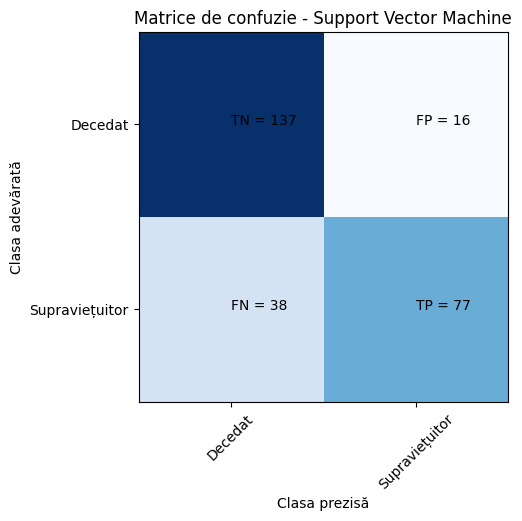

In [62]:
matrice_confuzie_svc = confusion_matrix(y_true=y_validare, y_pred=y_pred_svc)
plt.clf()
plt.imshow(matrice_confuzie_svc, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Decedat','Supraviețuitor']
plt.title('Matrice de confuzie - Support Vector Machine')
plt.ylabel('Clasa adevărată')
plt.xlabel('Clasa prezisă')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(matrice_confuzie_svc[i][j]))
plt.show()

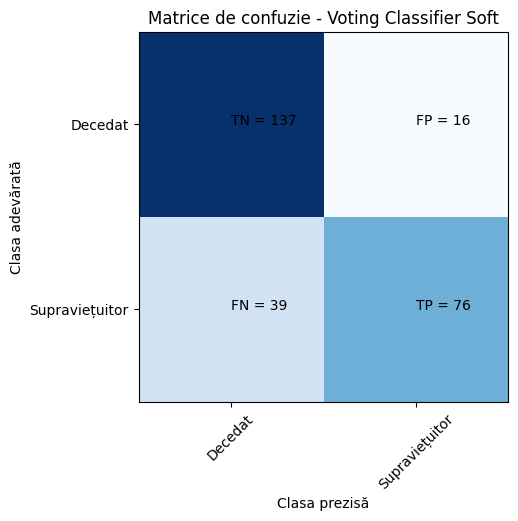

In [63]:
matrice_confuzie_vc_soft = confusion_matrix(y_true=y_validare, y_pred=y_pred_vc_soft)
plt.subplot(1,2,1)
plt.clf()
plt.imshow(matrice_confuzie_vc_soft, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Decedat','Supraviețuitor']
plt.title('Matrice de confuzie - Voting Classifier Soft')
plt.ylabel('Clasa adevărată')
plt.xlabel('Clasa prezisă')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(matrice_confuzie_vc_soft[i][j]))
plt.show()

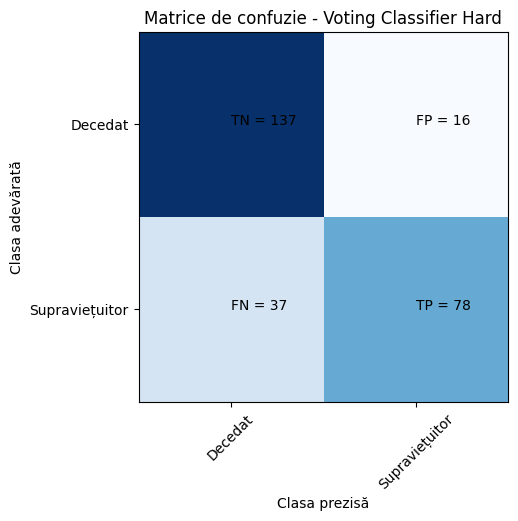

In [64]:
matrice_confuzie_vc_hard = confusion_matrix(y_true=y_validare, y_pred=y_pred_vc_hard)
plt.clf()
plt.imshow(matrice_confuzie_vc_hard, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Decedat','Supraviețuitor']
plt.title('Matrice de confuzie - Voting Classifier Hard')
plt.ylabel('Clasa adevărată')
plt.xlabel('Clasa prezisă')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(matrice_confuzie_vc_hard[i][j]))
plt.show()

In [65]:
print('Precizia modelului Random Forest este: %.3f' % precision_score(y_validare, y_pred_rf))
print('Recall-ul modelului Random Forest este: %.3f' % recall_score(y_validare, y_pred_rf))
print('Scorul F1 al modelului Random Forest este: %.3f' % f1_score(y_validare, y_pred_rf))

Precizia modelului Random Forest este: 0.812
Recall-ul modelului Random Forest este: 0.678
Scorul F1 al modelului Random Forest este: 0.739


In [66]:
print('Precizia modelului Random Forest este: %.3f' % precision_score(y_validare, y_pred_rf_threshold))
print('Recall-ul modelului Random Forest este: %.3f' % recall_score(y_validare, y_pred_rf_threshold))
print('Scorul F1 al modelului Random Forest este: %.3f' % f1_score(y_validare, y_pred_rf_threshold))

NameError: name 'y_pred_rf_threshold' is not defined

In [67]:
print('Precizia modelului Support Vector Machine este: %.3f' % precision_score(y_validare, y_pred_svc))
print('Recall-ul modelului Support Vector Machine este: %.3f' % recall_score(y_validare, y_pred_svc))
print('Scorul F1 al modelului Support Vector Machine este: %.3f' % f1_score(y_validare, y_pred_svc))

Precizia modelului Support Vector Machine este: 0.828
Recall-ul modelului Support Vector Machine este: 0.670
Scorul F1 al modelului Support Vector Machine este: 0.740


In [68]:
print('Precizia modelului Vot Hard este: %.3f' % precision_score(y_validare, y_pred_vc_hard))
print('Recall-ul modelului Vot Hard este: %.3f' % recall_score(y_validare, y_pred_vc_hard))
print('Scorul F1 al modelului Vot Hard este: %.3f' % f1_score(y_validare, y_pred_vc_hard))

Precizia modelului Vot Hard este: 0.830
Recall-ul modelului Vot Hard este: 0.678
Scorul F1 al modelului Vot Hard este: 0.746


In [69]:
print('Precizia modelului Vot Soft este: %.3f' % precision_score(y_validare, y_pred_vc_soft))
print('Recall-ul modelului Vot Soft este: %.3f' % recall_score(y_validare, y_pred_vc_soft))
print('Scorul F1 al modelului Vot Soft este: %.3f' % f1_score(y_validare, y_pred_vc_soft))

Precizia modelului Vot Soft este: 0.826
Recall-ul modelului Vot Soft este: 0.661
Scorul F1 al modelului Vot Soft este: 0.734


In [70]:
print('Precizia modelului Vot Soft este: %.3f' % precision_score(y_validare, y_pred_vc_soft_threshold))
print('Recall-ul modelului Vot Soft este: %.3f' % recall_score(y_validare, y_pred_vc_soft_threshold))
print('Scorul F1 al modelului Vot Soft este: %.3f' % f1_score(y_validare, y_pred_vc_soft_threshold))

NameError: name 'y_pred_vc_soft_threshold' is not defined

In [71]:
knn_final = knn.best_estimator_
svc_final = svc.best_estimator_
rf_final = rf.best_estimator_

In [72]:
#antrenez modelele întreg setul de date de antrenare
svc_final.fit(X_antrenare, y_antrenare)
rf_final.fit(X_antrenare, y_antrenare)
vot_hard.fit(X_antrenare, y_antrenare)
vot_soft.fit(X_antrenare, y_antrenare)
knn_final.fit(X_antrenare, y_antrenare)

KNeighborsClassifier(n_neighbors=3, p=1)

In [73]:
from tabulate import tabulate
headers = ["name", "score"]
values = sorted(zip(pd.DataFrame(X_antrenare, columns = coloane_finale).columns, rf_final.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

ModuleNotFoundError: No module named 'tabulate'

In [74]:
predictii_y_rf = rf_final.predict(X_test).astype(int)
predictii_y_svc = svc_final.predict(X_test).astype(int)
predictii_y_knn = knn_final.predict(X_test).astype(int)
predictii_y_vc_soft =  vot_soft.predict(X_test).astype(int)
predictii_y_vc_hard = vot_hard.predict(X_test).astype(int)

In [75]:
predictii_1 = {'PassengerId': date_test.PassengerId, 'Survived': predictii_y_rf}
submission = pd.DataFrame(data=predictii_1)

predictii_2 = {'PassengerId': date_test.PassengerId, 'Survived': predictii_y_vc_hard}
submission_2 = pd.DataFrame(data=predictii_2)

predictii_3 = {'PassengerId': date_test.PassengerId, 'Survived': predictii_y_vc_soft}
submission_3 = pd.DataFrame(data=predictii_3)

predictii_4 = {'PassengerId': date_test.PassengerId, 'Survived': predictii_y_svc}
submission_4 = pd.DataFrame(data=predictii_4)

predictii_5 = {'PassengerId': date_test.PassengerId, 'Survived': predictii_y_knn}
submission_5 = pd.DataFrame(data=predictii_5)

In [ ]:
submission.to_csv('submission_rf_noembarked.csv', index =False)
submission_2.to_csv('submission_vc_hard_noembarked.csv',index=False)
submission_3.to_csv('submission_vc_soft_noembarked.csv', index=False)
submission_4.to_csv('submission_svc_noembarked.csv', index=False)
submission_5.to_csv('submission_knn_noembarked.csv', index=False)